### Importando Bibliotecas

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import autograd.numpy as np_   
from autograd import grad

### Tratamento de Dados

In [46]:
# Substituímos nosso DataFrame para substituirmos o True por 1 e False por 0

df = pd.read_csv('archive/healthcare-dataset-stroke-data.csv')
df = pd.get_dummies(df)
df = df.replace({True:1, False:0})
df['stroke'] = df['stroke'].replace({1:1, 0:-1})
df.head()

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_32504\2473965428.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1, False:0})


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


### Correlação

In [47]:
# Calculamos a correlação e retiramos as colunas "id" e "stroke"

correlation = df.corr()['stroke']
correlation = correlation.drop('stroke') 
correlation = correlation.drop('id') 
correlation = correlation.sort_values(ascending=False)  
print(correlation)

age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.042374
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
Residence_type_Rural             -0.015458
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
ever_married_No                  -0.108340
Name: stroke, dtype: float64


### DataFrame de AVC's e Características

In [48]:
# DataFrame com as colunas stroke e id
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df_target = df[['stroke']].astype(float)

# DataFrame sem a coluna stroke
df_features = df.drop(columns=['stroke', 'id']).astype(float)
df_features.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Array numpy sem o index
n_target = df_target.to_numpy()

# n_target = df_target.to_numpy()
n_features = df_features.to_numpy()
n_target

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [-1.],
       [-1.],
       [-1.]])

### Separando em Treino e Teste

In [50]:
# Criação das variáveis de teste e treino com n_features e n_target

X_train, X_test, y_train, y_test = train_test_split(n_features, n_target, train_size=0.5)

In [51]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 2555), (21, 2555), (1, 2555), (1, 2555))

In [52]:
y_train

array([[-1., -1., -1., ..., -1., -1., -1.]])

### Função para calcular Acurácia

In [53]:
# Função de Cálculo da Acurácia

def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [54]:
# Função usada pelo gradiente

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

### Árvore de Decisão

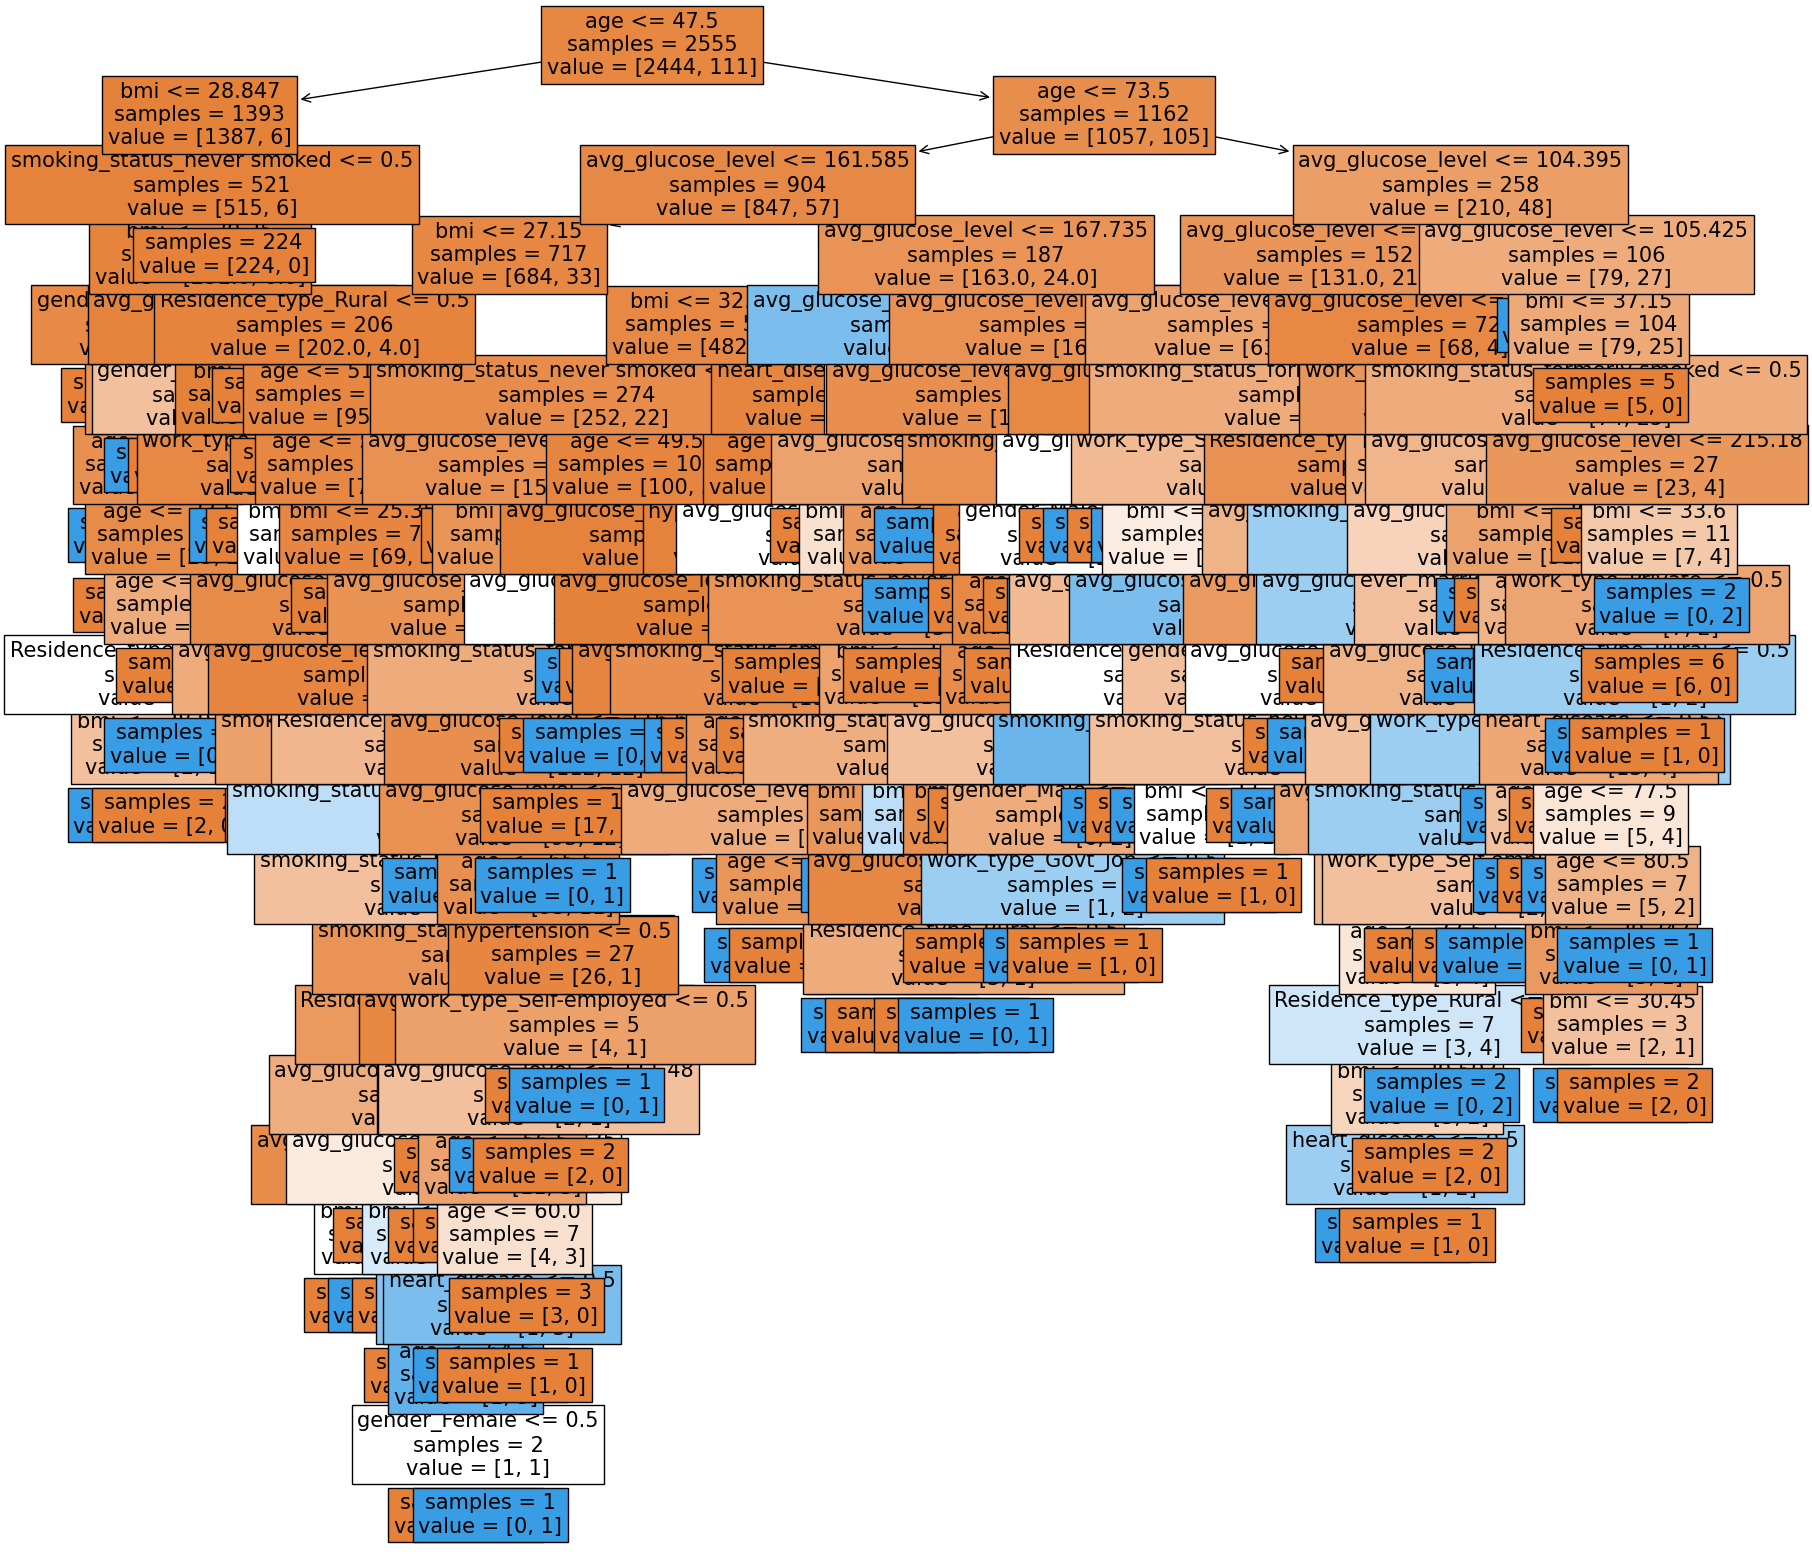

In [71]:
# Criaçaõ da nossa Árvove de Decisão com nossos X e Y de treino e teste para df_features e df_target

from sklearn.tree import DecisionTreeClassifier

X_train_, X_test_, y_train_, y_test_ = train_test_split(df_features, df_target, train_size=0.5)

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_, y_train_)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=X_train_.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

### Acurácia e Hipótese Nula

In [56]:
# Conte o nÚmero de vezes que aperece o número 1 no vetor y_train

np.sum(y_train == 1)/y_train.shape[1]

0.0512720156555773

In [64]:
# Acurácia Regressão Linear

w = np.random.randn( X_test.shape[0],1)
b = 0.0
alpha = 10**-5
for n in range(10000):
    grad_ = g( (w, b, X_train, y_train) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]
predicao = w.T @ X_test + b
acuracia = accuracy(y_test, predicao)
print(f"Acurácia: {acuracia}")

Acurácia: 0.7307240704500978


In [72]:
# Acurácia Árvore de Decisão

print(f"Acurácia: {accuracy(y_test_.to_numpy(), tree.predict(X_test_.to_numpy()))}")

Acurácia: 0.905142366948656


c:\Insper_real_oficial\alg_lin\APS\241-alglin-aps6-ribollarafa\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Fatores ligados a ter AVC's

In [59]:
# Fatores Ligados ao AVC dada nossa regressão linear

regressao_linear_correlacao = []
for i in range(21):
    regressao_linear_correlacao.append(df_features.columns[np.argsort(w.T)[0][-i]])

In [60]:
# Fatores Ligados ao AVC dada nossa árvore de decisão

arvore_decisao_correlacao = []
for i in range(21):
    arvore_decisao_correlacao.append(df_features.columns[np.argsort(tree.feature_importances_)[-i]])

In [61]:
correlacao = []

for indices in correlation.index:
    correlacao.append(indices)

In [62]:
# DataFrame com o que está mais relacionado ao AVC dada as 3 formas

data = {
    "correlacao": correlacao,
    "regressao_linear": regressao_linear_correlacao,
    "arvore_decisao": arvore_decisao_correlacao,
}

df_correlacoes = pd.DataFrame(data)
print(df_correlacoes)

                        correlacao                regressao_linear  \
0                              age                    gender_Other   
1                    heart_disease                   heart_disease   
2                avg_glucose_level     smoking_status_never smoked   
3                     hypertension                ever_married_Yes   
4                 ever_married_Yes  smoking_status_formerly smoked   
5   smoking_status_formerly smoked            Residence_type_Urban   
6          work_type_Self-employed           smoking_status_smokes   
7                              bmi            Residence_type_Rural   
8             Residence_type_Urban               avg_glucose_level   
9                work_type_Private                     gender_Male   
10                     gender_Male                             bmi   
11           smoking_status_smokes                             age   
12              work_type_Govt_job               work_type_Private   
13                  